<a href="https://colab.research.google.com/github/venkatchintha/Monk_Object_Detection/blob/master/pytorch_retinanet_Train_Resnet34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 7155 (delta 15), reused 63 (delta 11), pack-reused 7081
Receiving objects: 100% (7155/7155), 205.46 MiB | 12.26 MiB/s, done.
Resolving deltas: 100% (2833/2833), done.
Checking out files: 100% (6326/6326), done.


In [ ]:
! cd Monk_Object_Detection/5_pytorch_retinanet/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-cp36-none-any.whl size=12422 sha256=251c465013d9876cbed7d3ef22f3718c6ba81423af2de0297f56fac1fbbc497b
  Stored in directory: /root/.cache/pip/wheels/42/1e/a9/2a578ba9ad04e776e80bf0f70d8a7f4c29ec0718b92d8f6ccd
Successfully built efficientnet-pytorch
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-cp36-none-any.whl size=17452 sha256=c3b3c453b89a57e409f6d0f5076ea40b516c9d4ddfea2d0fdc13d82c518d8b99
  Stored in directory: /root/.cache/pip/wheels/62/4f/a3/afd4a68f5add45a668c14efa53b64d5cffb2be6bacf993c151
Successfully built dicttoxml


In [ ]:

import os
import sys
sys.path.append("Monk_Object_Detection/5_pytorch_retinanet/lib/");

In [ ]:
from train_detector import Detector

In [ ]:
gtf = Detector();

In [ ]:
root_dir = "/content/drive/My Drive/Kaggle/";
coco_dir = "nexet";
img_dir = "./";
set_dir = "nexet_2017_1";

In [ ]:
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=4, use_gpu=True)

loading annotations into memory...
Done (t=3.70s)
creating index...
index created!
Num training images: 49281


In [ ]:

gtf.Model(model_name="resnet34");

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to ./resnet34-333f7ec4.pth


In [ ]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, print_interval=20)

In [12]:

gtf.Train(num_epochs=2, output_model_name="final_model.pt");

Monk_Object_Detection/5_pytorch_retinanet/lib/retinanet/model.py:52: UserWarning: Mixed memory format inputs detected while calling the operator. The operator will output contiguous tensor even if some of the inputs are in channels_last format. (Triggered internally at  /pytorch/aten/src/ATen/native/TensorIterator.cpp:918.)
  P4_x = P5_upsampled_x + P4_x
Monk_Object_Detection/5_pytorch_retinanet/lib/retinanet/model.py:57: UserWarning: Mixed memory format inputs detected while calling the operator. The operator will output channels_last tensor even if some of the inputs are not in channels_last format. (Triggered internally at  /pytorch/aten/src/ATen/native/TensorIterator.cpp:924.)
  P3_x = P3_x + P4_upsampled_x


Epoch: 0 | Iteration: 0 | Classification loss: 1.13254 | Regression loss: 1.04464 | Running loss: 2.17718
Epoch: 0 | Iteration: 20 | Classification loss: 0.85778 | Regression loss: 0.95862 | Running loss: 1.94691
Epoch: 0 | Iteration: 40 | Classification loss: 0.49856 | Regression loss: 0.87792 | Running loss: 1.77892
Epoch: 0 | Iteration: 60 | Classification loss: 0.58245 | Regression loss: 0.81456 | Running loss: 1.67040
Epoch: 0 | Iteration: 80 | Classification loss: 0.22244 | Regression loss: 0.55983 | Running loss: 1.57509
Epoch: 0 | Iteration: 100 | Classification loss: 0.43184 | Regression loss: 0.62870 | Running loss: 1.50523
Epoch: 0 | Iteration: 120 | Classification loss: 0.53123 | Regression loss: 0.74789 | Running loss: 1.45068
Epoch: 0 | Iteration: 140 | Classification loss: 0.23047 | Regression loss: 0.56992 | Running loss: 1.40611
Epoch: 0 | Iteration: 160 | Classification loss: 0.55485 | Regression loss: 0.65330 | Running loss: 1.36880
Epoch: 0 | Iteration: 180 | Classi

In [13]:
!ls


drive		Monk_Object_Detection  resume.pt
final_model.pt	resnet34-333f7ec4.pth  sample_data


In [14]:
import os
import sys
sys.path.append("Monk_Object_Detection/5_pytorch_retinanet/lib/");

In [15]:
from infer_detector import Infer


In [16]:
gtf = Infer();

In [17]:
gtf.Model(model_path="final_model.pt");

In [18]:
f = open("/content/drive/My Drive/Kaggle/nexet/annotations/classes.txt", 'r');
class_list = f.readlines();
f.close();
for i in range(len(class_list)):
    class_list[i] = class_list[i][:-1]

In [19]:
class_list

['bus', 'car', 'pickup_truck', 'truck', 'van']

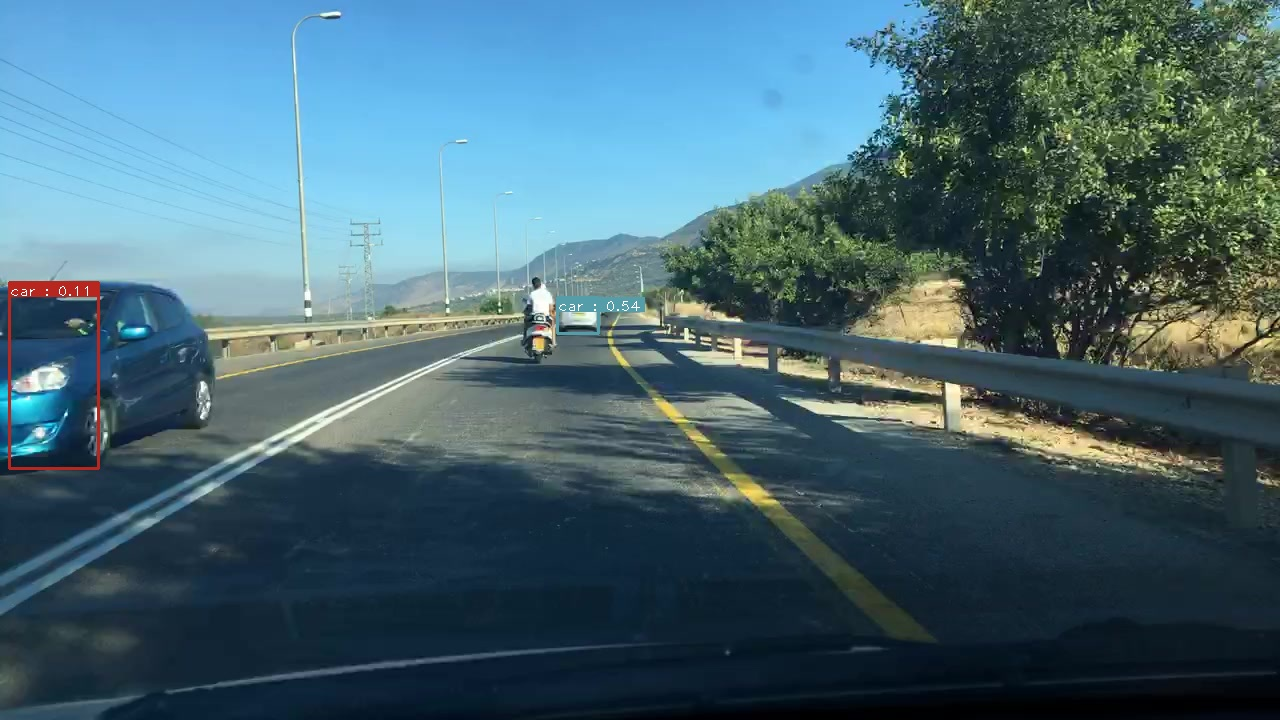

In [28]:
img_path = "/content/drive/My Drive/Kaggle/nexet/Test_images/7ee3a93b-7758-407a-bc33-2a7a158bbd4d.mov-0001.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.1);
from IPython.display import Image
Image(filename='output.jpg')

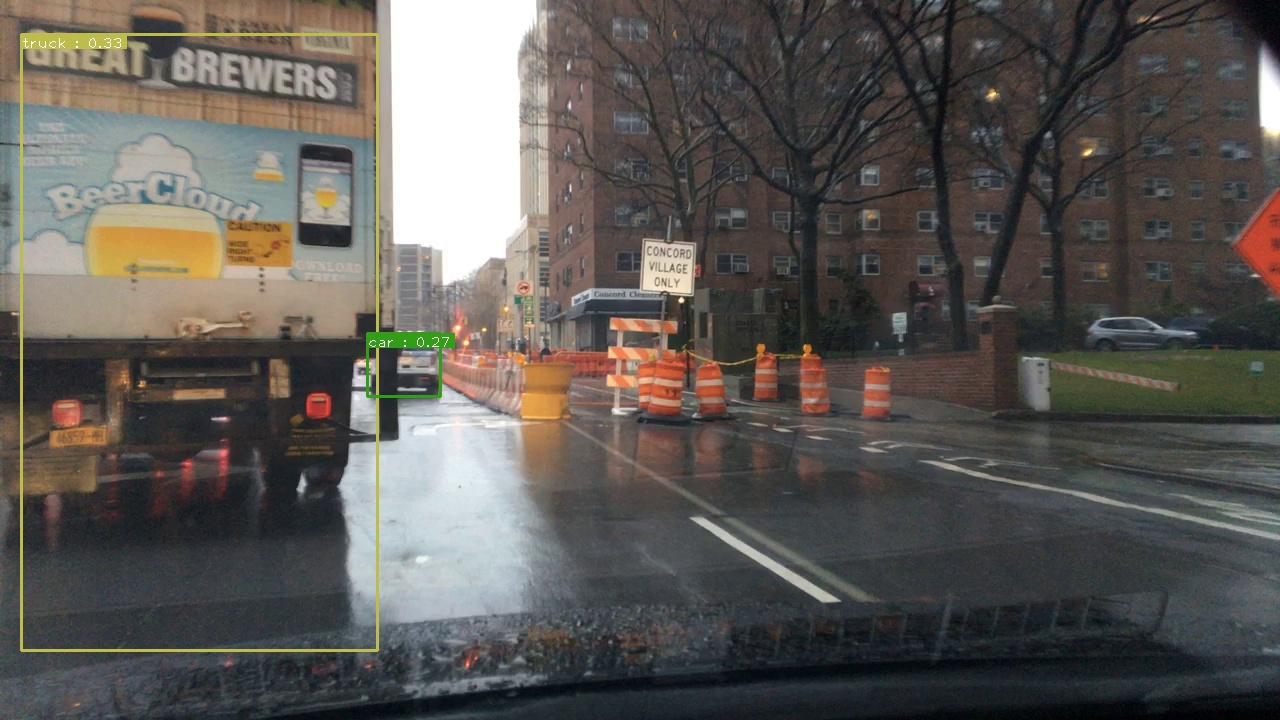

In [44]:
img_path = "/content/drive/My Drive/Kaggle/nexet/Test_images/frame_721da0cf-febc-45c4-8610-bd993e0fa0b0_00001-1280_720.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.145);
from IPython.display import Image
Image(filename='output.jpg')

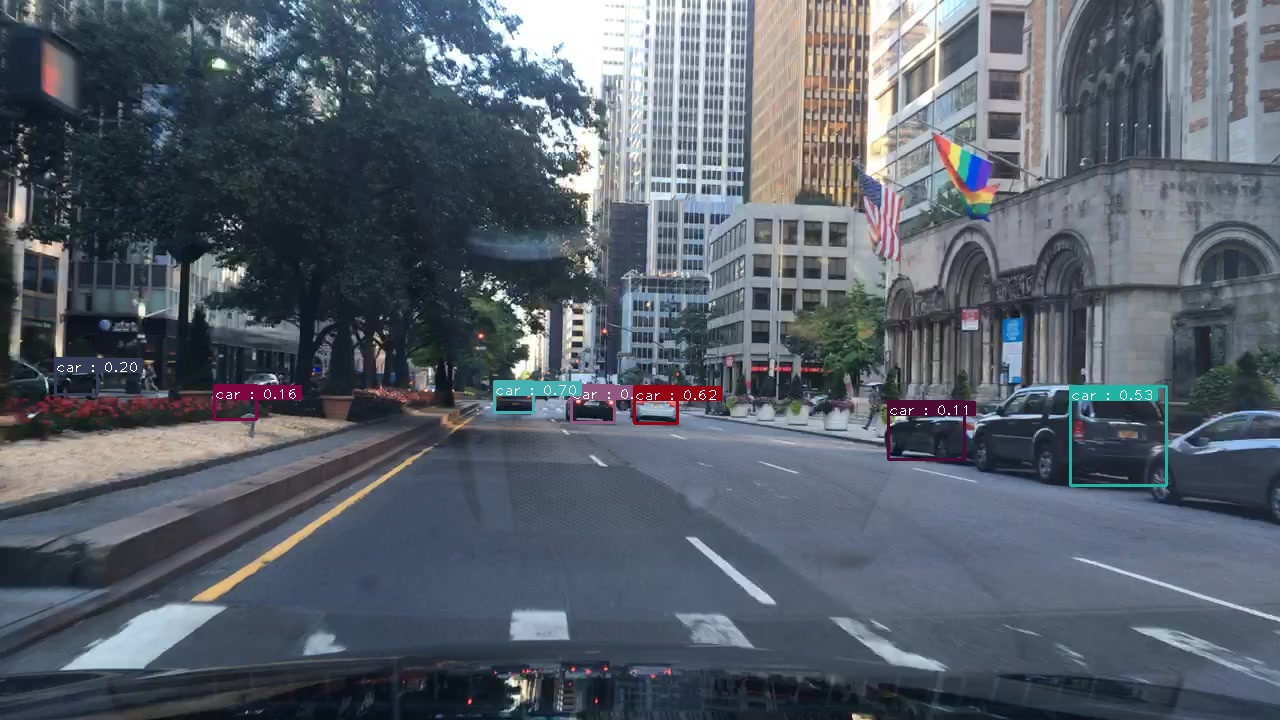

In [50]:
img_path = "/content/drive/My Drive/Kaggle/nexet/Test_images/244cd80b-194d-4bd4-aaa4-ab7ed170e3ad.mov-0001.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.1);
from IPython.display import Image
Image(filename='output.jpg')